# Hierarchical clustering

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import normalize

### Hierarchies of stocks

In [2]:



df = pd.read_csv('datasets/company-stock-movements-2010-2015-incl.csv')

movements = df.iloc[:,1:].values
companies = df.iloc[:,0].values

df.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


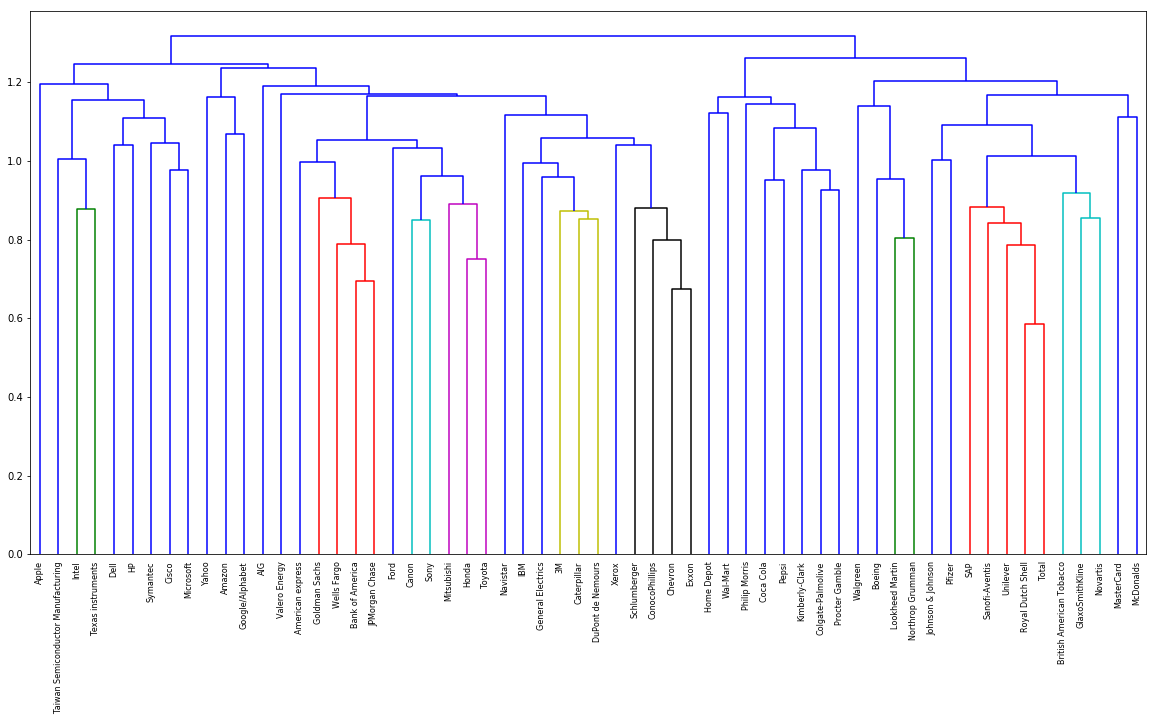

In [3]:
normalized_movements = normalize(movements)

mergings = linkage(normalized_movements, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergings, labels=companies, leaf_rotation=90, leaf_font_size=8);

### Grain dataset

In [17]:
df = pd.read_csv('datasets/Grains/seeds.csv', header=None)

label_mapper = {1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}
varieties = df.iloc[:,-1].map(label_mapper).values

samples = df.iloc[:,:-1].values
samples.shape

(210, 7)

**Complete** linkage: the distance between clusters is the distance between the **furthest** points of the clusters.<br>
**Single** linkage: the distance between clusters is the distance between the **closet** points of the clusters.

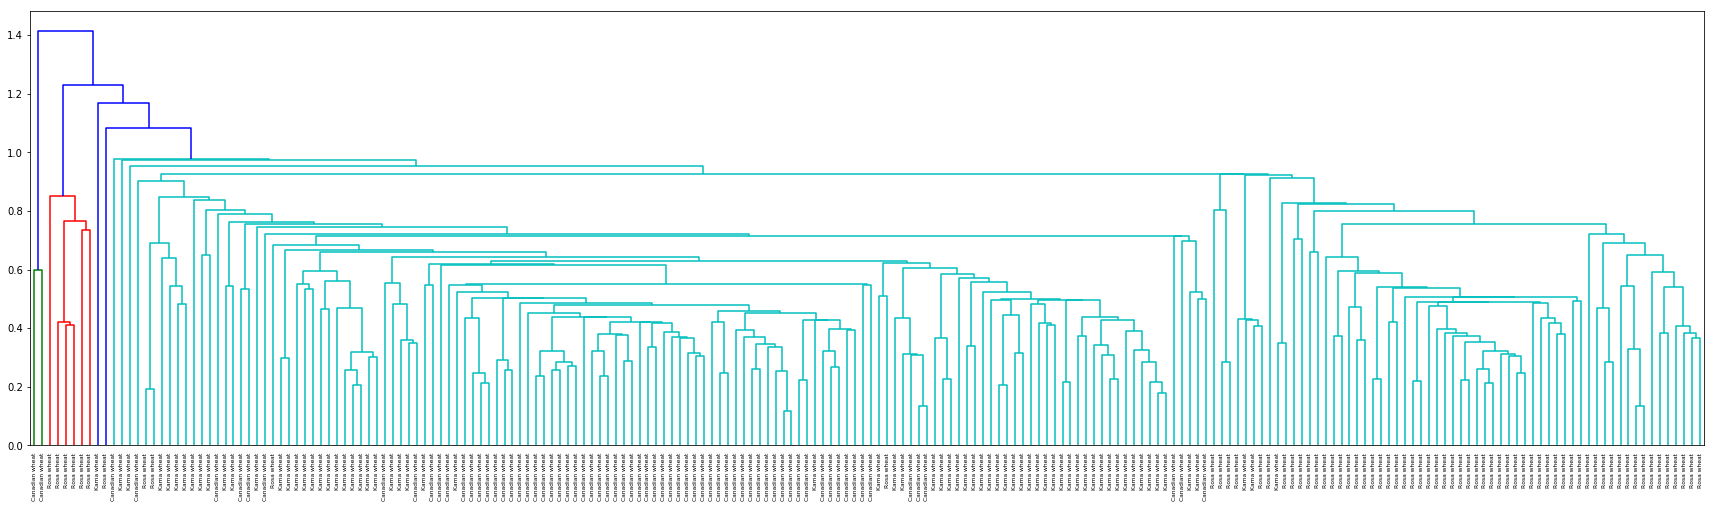

In [18]:
plt.figure(figsize=(30,8))
mergings = linkage(samples, method='single')
dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6);

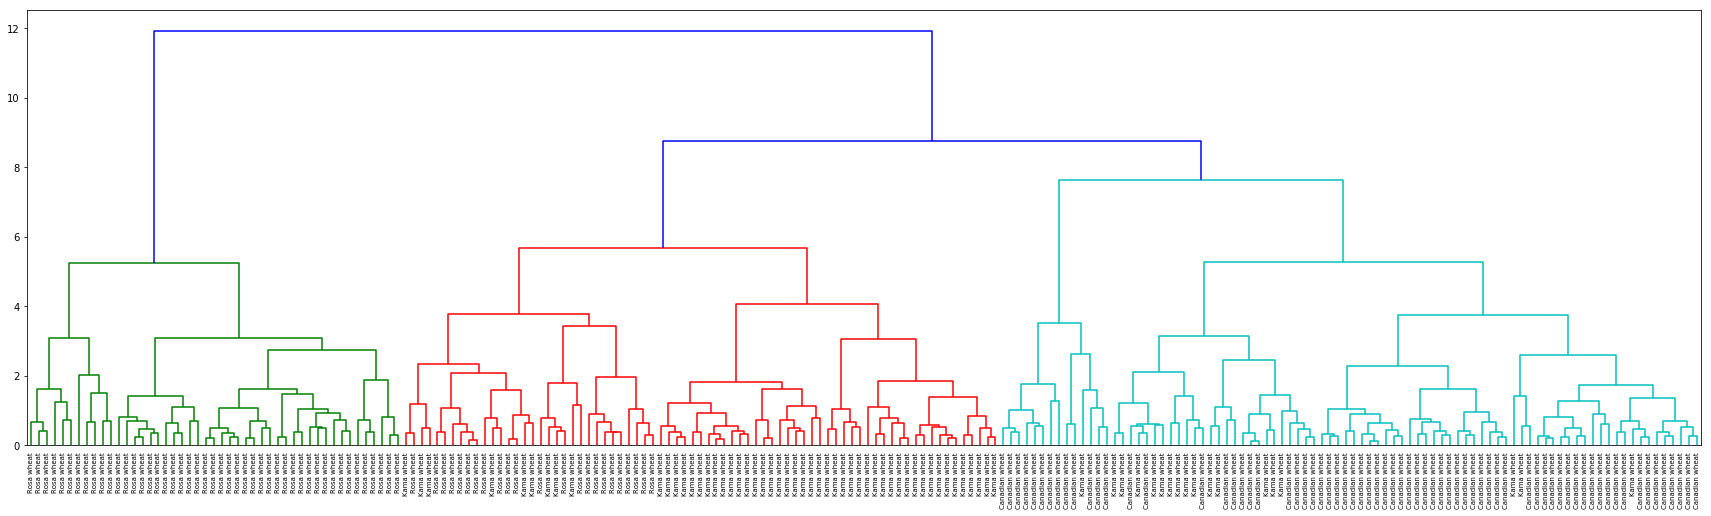

In [19]:
# Calculate the linkage
mergings = linkage(samples, method='complete')

plt.figure(figsize=(30,8))
# Plot the dendrogram, using varieties as labels
dendrogram(mergings, labels=varieties,
           leaf_rotation=90,
           leaf_font_size=7);

### Extracting cluster label
Using fcluster() at the designated distance

In [16]:
mergings = linkage(samples, method='complete')
labels = fcluster(mergings, 8, criterion='distance')
df = pd.DataFrame({'labels':labels, 'varieties':varieties})
pd.crosstab(df['labels'], df['varieties'])

varieties,Canadian wheat,Kama wheat,Rosa wheat
labels,,,
1,0,0,47
2,0,52,23
3,70,18,0
